In [2]:
from stingray import Crossspectrum, Lightcurve
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\stingray\crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


1a) Photons from the disk being Compton upscattered (Inverse Compton) correspond to the hard X-Ray enery band; Due to inverse compton scattering, photons gain energy and thus belong in hard x-ray band. 

Soft X-rays come from disk (Blackbody)

In [4]:
# Read the light curves
with fits.open('maxi_106_1msbin_p5to1kev_curve.lc') as hdul:
    lc_1 = Lightcurve(hdul[1].data['Time'],hdul[1].data['Rate'])
with fits.open('maxi_106_1msbin_1to10kev_curve.lc') as hdul:
    lc_2 = Lightcurve(hdul[1].data['Time'],hdul[1].data['Rate'])

# Change the data type
lc_1.counts = lc_1.counts.astype('float')
lc_2.counts = lc_2.counts.astype('float')

# Evaluate the cross spectrum
cross = Crossspectrum(lc_1,lc_2)

D:\Anaconda\lib\site-packages\stingray\utils.py:118: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
D:\Anaconda\lib\site-packages\stingray\utils.py:118: UserWarning: SIMON says: Errorbars on cross spectra are not thoroughly tested. Please report any inconsistencies.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


Text(0.5, 1.0, 'Time lag as function of frequency')

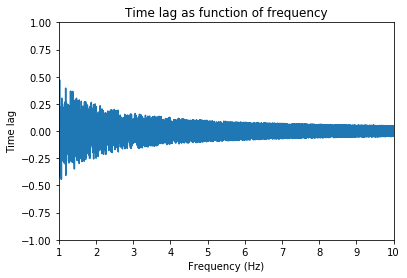

In [120]:
#1b)
power = cross.power
freq = cross.freq
arg = np.angle(power)
lag = arg/(2*np.pi*freq)

plt.plot(freq,lag)
plt.xlim(1,10)
plt.ylim(-1,1)
plt.ylabel("Time lag")
plt.xlabel("Frequency (Hz)")
plt.title("Time lag as function of frequency")

Text(0.5, 1.0, 'Time lag as function of frequency')

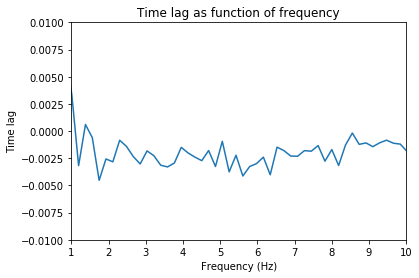

In [121]:
#averaging every 1000 points, we get the following:

avgLag = np.mean(lag[0:2718000].reshape(-1, 1000), axis=1)  # take avg of every 1000 lags
avgFreq = np.mean(freq[0:2718000].reshape(-1, 1000), axis=1)  # take avg of every 1000 lags

#print(len(avgLag[np.min(np.where(avgFreq>1)):np.min(np.where(avgFreq>10))]))
plt.plot(avgFreq, avgLag)
plt.xlim(1,10)
plt.ylim(-0.01,0.01)
plt.ylabel("Time lag")
plt.xlabel("Frequency (Hz)")
plt.title("Time lag as function of frequency")

Text(0.5, 1.0, 'Time lag as function of frequency')

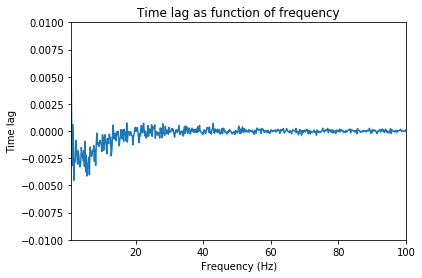

In [122]:
plt.plot(avgFreq, avgLag)
plt.xlim(1,100)
plt.ylim(-0.01,0.01)
plt.ylabel("Time lag")
plt.xlabel("Frequency (Hz)")
plt.title("Time lag as function of frequency")

1c)

From the plots above, we can see that at higher frequencues (>= 10hz) the timelag is approaching 0. This is possibly due to the blackblody dominating at higher frequencies. If BB, then reflected=emitted from the diagram provided. This would mean thermal equilibrium and thus energies should be similar/comparable. This would give us very tiny timelags, or 0 in the limit of high frequency. In our case, at about 10Hz, the lags are slightly negative (small but below 0). 

This is because photons coming from the corona that are reflected off the accretion disk lag behind. They have to travel to the disk and then back to our line of sight, and thus lag behind -> reverberation lagging. In this case, the hard X-ray photons would be lagging since the corona is the one lagging, which corresponds to the IC scatter photons. 

The corona emission can also reheat the whole accretion disk. We would see the BB spectrum of this disk at a later time -> thermal lags. In this case, the soft X-rays lag (BB). 

In our case, I think the hard X-rays would lag since they travel to disk first and then to us. Thus causing the negative lag. 

1d)

Larger area would give us a larger sample of photons. Then, we can perform an analysis like we did in the last midterm question. We could subtract the background data from the system data to get the data corresponding to the source. The larger the area, more photons we get and thus we can correct for the source data better. 


Higher time resolution should allow us to distinguish the time lags more clearly. Currently, we can see lags from 1-10Hz. With a higher time resolution, we could be able to see the time lags <1Hz. The higher the time resolution, more smooth the data could be and we can correct for that accordingly. Smoother data is also a possibility. 

Currently we can perform the analysis at 0.5-10KeV (0.5-1 and 1-10KeV). Similar to a higher time resolution: with a higher energy resoution we should be able to able to observe the lags in different, more specific energy bands. I'm assuming that right at the event horizon, it corresponds to a very high energy regime. With a higher energy resolution, it's possible we can probe that part and learn more about the Black Hole. 

Using lags, we can possibly find the mass of the Black Hole: From the time lag, we can see how much gravity the BH must exert to delay the times. From that, we can interpolate and find its mass. 

We can also probe the rate of expansion of the universe. Just like they used Type Ia supernovae to show that expansion rate is increasing, we can possibly do a similar analysis and find the expansion from the time lag. Assuming we know distance and mass to BH, can compute the time it would take the first photons and the lagged photons to come. Compare that to theory, and find expansion rate. 